# **Project Name**    - Iris Flower Classification

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score , recall_score, f1_score,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV , RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Read Dataset

In [142]:
df = pd.read_csv("dataset.csv")

In [ ]:
df.head()   # show sample from data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [144]:
df.shape

(150, 6)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [146]:
dup = df.duplicated().sum()
print(f"Number of duplicated rows : {dup}")

Number of duplicated rows : 0


In [147]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [148]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [149]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [59]:
for i in df.columns.tolist():
    print(f"Number of unique values in {i} is {df[i].nunique()}")

Number of unique values in Id is 150
Number of unique values in SepalLengthCm is 35
Number of unique values in SepalWidthCm is 23
Number of unique values in PetalLengthCm is 43
Number of unique values in PetalWidthCm is 22
Number of unique values in Species is 3


In [60]:
## drop 1st column
data = df.iloc[:,1:]

In [61]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 4. Data Vizualization: Understand the relationships between variables

#### chart 1 : Distribution of numberical variables

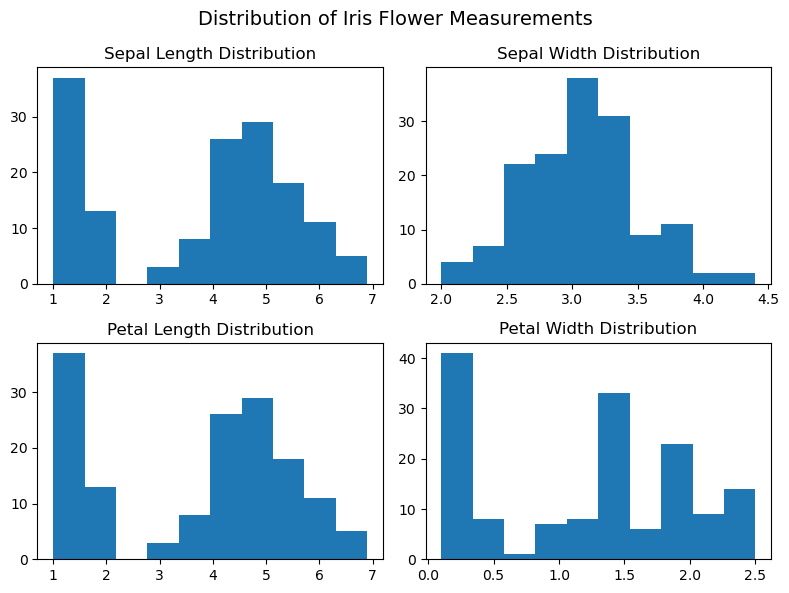

In [62]:
plt.figure(figsize=(8,6))
plt.suptitle("Distribution of Iris Flower Measurements" , fontsize = 14)

# subplot-1
plt.subplot(2,2,1) # Top-left
plt.hist(data['PetalLengthCm'])
plt.title('Sepal Length Distribution')

# subplot-2
plt.subplot(2,2,2)  # Top-right
plt.hist(data['SepalWidthCm'])
plt.title('Sepal Width Distribution')

# subplot-3
plt.subplot(2,2,3)   # Bottom-left
plt.hist(data['PetalLengthCm'])
plt.title('Petal Length Distribution')

# subplot-4
plt.subplot(2,2,4)  # Bottom right
plt.hist(data['PetalWidthCm'])
plt.title('Petal Width Distribution')

plt.tight_layout()
plt.show()

#### Chart - 2 : Sepal Length vs Sepal Width


In [63]:
colors = ['red','yellow','green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

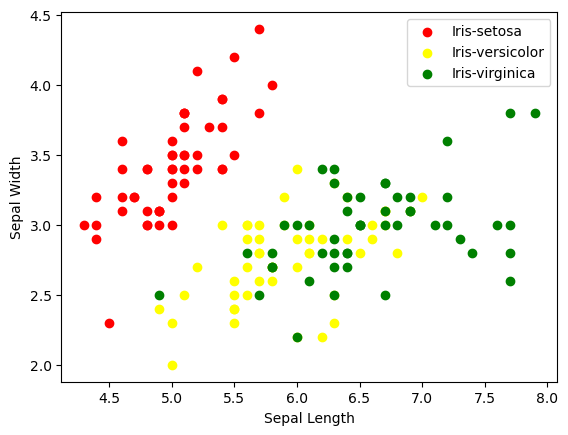

In [64]:
# Chart - 2 Scatter plot visualization code for Sepal Length vs Sepal Width.
# Create a scatter plot for Sepal Length vs Sepal Width for each species.
for i in range(3):
    x = data[data['Species'] == species[i]]   # x contain only rows for the current species
    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])
    
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

#### Chart - 3 : Petal Length vs Petal Width


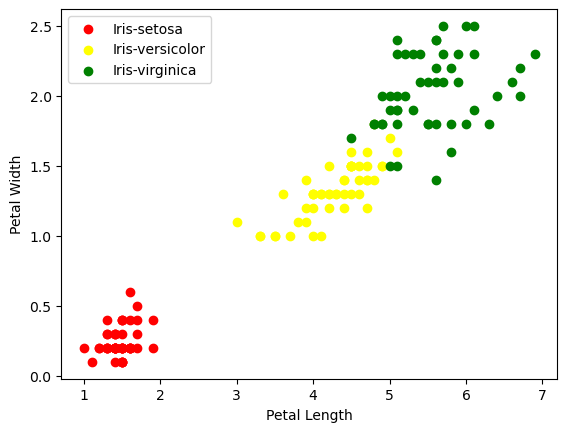

In [65]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
    
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

#### Chart - 4 : Sepal Length vs Petal Length


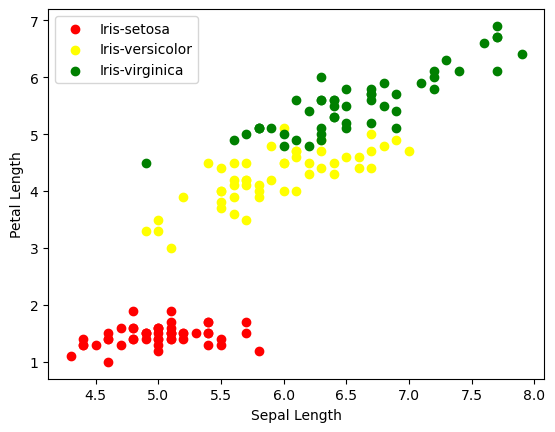

In [66]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i],label=species[i])
    
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.show()

#### Chart - 5 : Sepal Width vs Petal Width


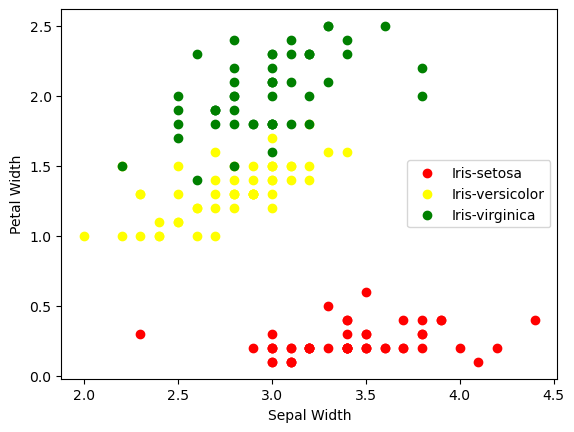

In [67]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
    
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

#### Chart - 6 : Correlation Heatmap


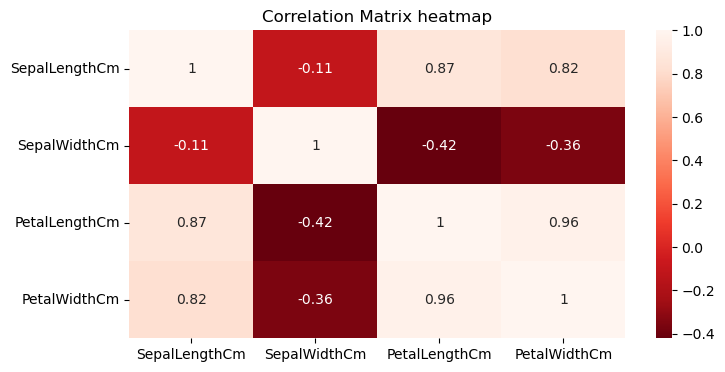

In [68]:
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(8,4))
sns.heatmap(corr_matrix,annot=True,cmap='Reds_r')

plt.title("Correlation Matrix heatmap")
plt.show()

#### 5. Feature Engineering & Data Pre-processing

In [69]:
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])

unique_species = data['Species'].unique()

print(f"Encoded species values is {unique_species}" )

Encoded species values is [0 1 2]


In [70]:
## Data Scaling 
x = data.drop(columns=['Species'],axis=1)
y = data['Species']

In [71]:
## Data spliting
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.3)

In [72]:
y_train.value_counts()

Species
0    36
2    36
1    33
Name: count, dtype: int64

### ML Model Implementation

In [73]:
def evaluate_model(model,x_train,x_test,y_train,y_test):
    # Fit the model to the training data
    model.fit(x_train,y_train)
    # make predictions on tne test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    # calculate confusion matrix
    cm_train = confusion_matrix(y_train,y_pred_train)
    cm_test = confusion_matrix(y_test,y_pred_test)
    
    fig ,ax = plt.subplots(1,2,figsize=(11,4))
    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")
    
    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")
    
    plt.tight_layout()
    plt.show()
    
    
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score

In [74]:
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])


### Model 1 : Logistic Regression

In [75]:
lr_model = LogisticRegression(fit_intercept=True,max_iter=10000)


Confusion Matrix:


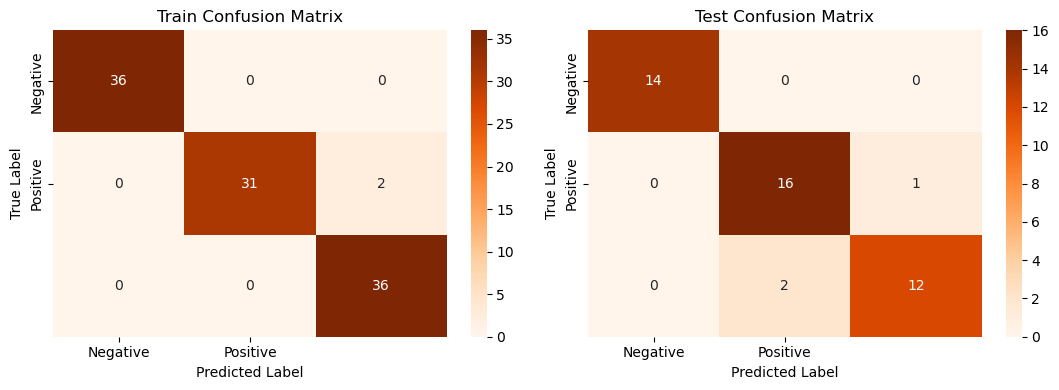


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  36        |
| 1            |    1        | 0.939394 |   0.96875  |  33        |
| 2            |    0.947368 | 1        |   0.972973 |  36        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.982456 | 0.979798 |   0.980574 | 105        |
| weighted avg |    0.981955 | 0.980952 |   0.980912 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 14        |
| 1            |    0.888889 | 0.941176 |   0.914286 | 17        |
| 2            |    0.923077 | 0.857143 |   0.888889 | 14        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.9333

In [76]:
lr_score = evaluate_model(lr_model, x_train, x_test, y_train, y_test)


In [77]:

# Updated Evaluation metric Score Chart
score['Logistic regression'] = lr_score
score

,Logistic regression
Precision Train,0.981955
Precision Test,0.934093
Recall Train,0.980952
Recall Test,0.933333
Accuracy Train,0.980952
Accuracy Test,0.933333
F1 macro Train,0.980912
F1 macro Test,0.933051


### 2. Cross- Validation & Hyperparameter Tuning

In [79]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(x_train, y_train)

# Select the best hyperparameters found by GridSearchCV
best_params = grid.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 1, 'penalty': 'l2', 'solver': 'saga'}


In [80]:
lr_model2 = LogisticRegression(C=best_params['C'],
                               penalty=best_params['penalty'],
                               solver=best_params['solver'],
                               max_iter=10000,
                               random_state=0)


Confusion Matrix:


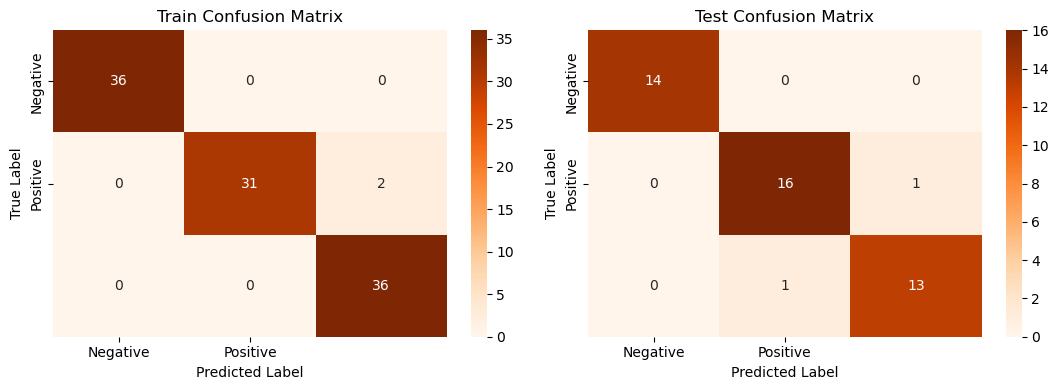


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  36        |
| 1            |    1        | 0.939394 |   0.96875  |  33        |
| 2            |    0.947368 | 1        |   0.972973 |  36        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.982456 | 0.979798 |   0.980574 | 105        |
| weighted avg |    0.981955 | 0.980952 |   0.980912 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 14        |
| 1            |    0.941176 | 0.941176 |   0.941176 | 17        |
| 2            |    0.928571 | 0.928571 |   0.928571 | 14        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [81]:
lr_score2 = evaluate_model(lr_model2,x_train,x_test,y_train,y_test)

In [82]:
score['Logistic regression tuned'] = lr_score2

In [83]:
score

,Logistic regression,Logistic regression tuned
Precision Train,0.981955,0.981955
Precision Test,0.934093,0.955556
Recall Train,0.980952,0.980952
Recall Test,0.933333,0.955556
Accuracy Train,0.980952,0.980952
Accuracy Test,0.933333,0.955556
F1 macro Train,0.980912,0.980912
F1 macro Test,0.933051,0.955556


### Model-2 : Decision Tree

In [84]:
dt_model = DecisionTreeClassifier(random_state=20)


Confusion Matrix:


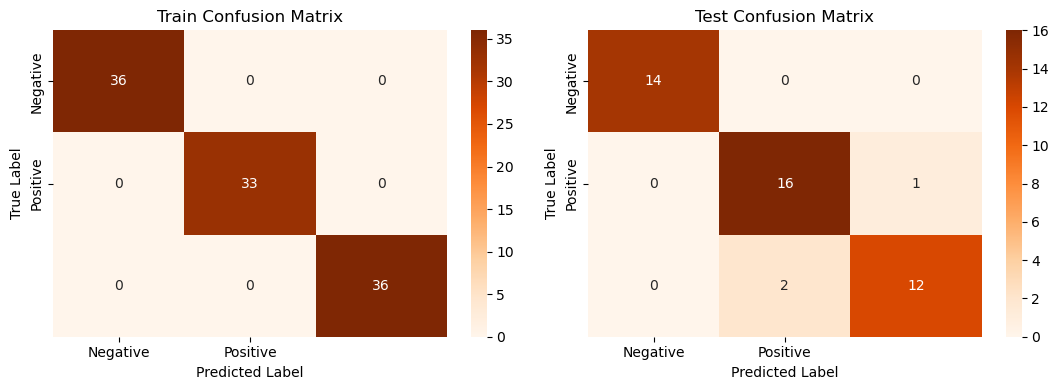


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        36 |
| 1            |           1 |        1 |          1 |        33 |
| 2            |           1 |        1 |          1 |        36 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 14        |
| 1            |    0.888889 | 0.941176 |   0.914286 | 17        |
| 2            |    0.923077 | 0.857143 |   0.888889 | 14        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.933333 |
| m

In [85]:
dt_score = evaluate_model(dt_model,x_train,x_test,y_train,y_test)

In [87]:
score['Decision Tree'] = dt_score
score

,Logistic regression,Logistic regression tuned,Decision Tree
Precision Train,0.981955,0.981955,1.000000
Precision Test,0.934093,0.955556,0.934093
Recall Train,0.980952,0.980952,1.000000
Recall Test,0.933333,0.955556,0.933333
Accuracy Train,0.980952,0.980952,1.000000
Accuracy Test,0.933333,0.955556,0.933333
F1 macro Train,0.980912,0.980912,1.000000
F1 macro Test,0.933051,0.955556,0.933051


### Cross-validation & HyperParameter tuning

In [88]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

# Initialize the model
model = DecisionTreeClassifier()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, grid, cv=rskf)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [89]:
# Train a new model with the best hyperparameters
dt_model2 = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 min_samples_split=best_params['min_samples_split'],
                                 random_state=20)


Confusion Matrix:


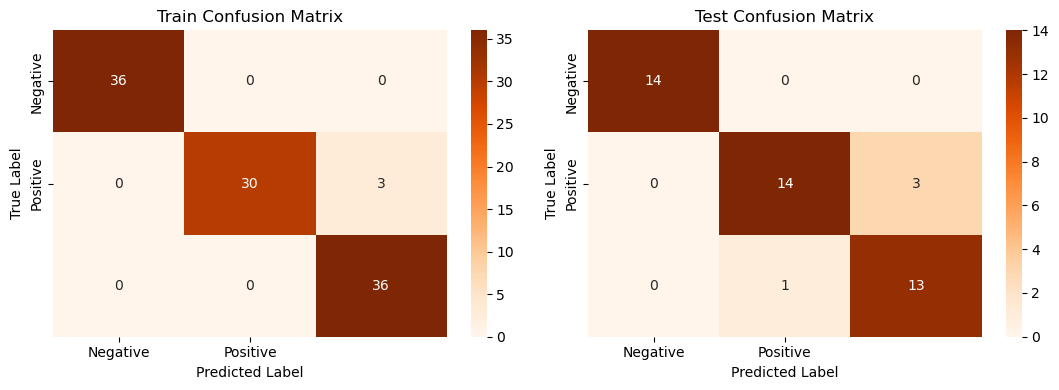


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  36        |
| 1            |    1        | 0.909091 |   0.952381 |  33        |
| 2            |    0.923077 | 1        |   0.96     |  36        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.974359 | 0.969697 |   0.970794 | 105        |
| weighted avg |    0.973626 | 0.971429 |   0.97132  | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 14        |
| 1            |    0.933333 | 0.823529 |   0.875    | 17        |
| 2            |    0.8125   | 0.928571 |   0.866667 | 14        |
| accuracy     |    0.911111 | 0.911111 |   0.911111 |  0.9111

In [90]:
# Visualizing evaluation Metric Score chart
dt2_score = evaluate_model(dt_model2, x_train, x_test, y_train, y_test)

In [91]:
score['Decision Tree tuned'] = dt2_score

In [92]:
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned
Precision Train,0.981955,0.981955,1.000000,0.973626
Precision Test,0.934093,0.955556,0.934093,0.916481
Recall Train,0.980952,0.980952,1.000000,0.971429
Recall Test,0.933333,0.955556,0.933333,0.911111
Accuracy Train,0.980952,0.980952,1.000000,0.971429
Accuracy Test,0.933333,0.955556,0.933333,0.911111
F1 macro Train,0.980912,0.980912,1.000000,0.971320
F1 macro Test,0.933051,0.955556,0.933051,0.911296


### Model - 3 : Random Forest

In [93]:
rf_model = RandomForestClassifier(random_state=0)


Confusion Matrix:


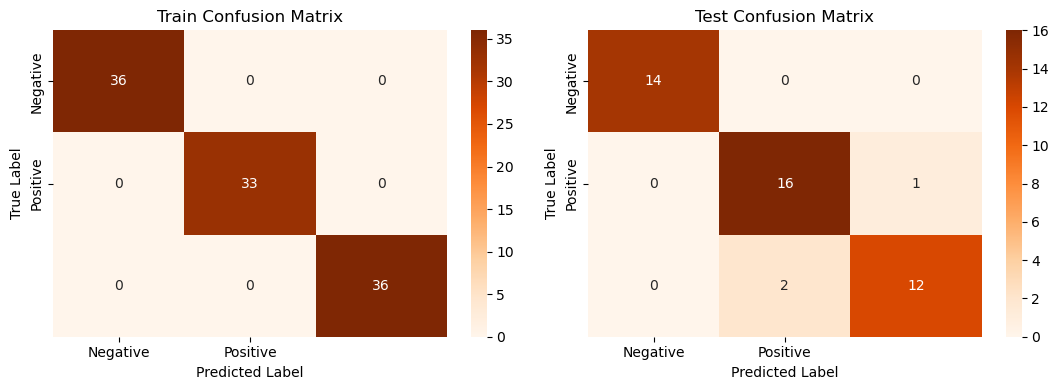


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        36 |
| 1            |           1 |        1 |          1 |        33 |
| 2            |           1 |        1 |          1 |        36 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 14        |
| 1            |    0.888889 | 0.941176 |   0.914286 | 17        |
| 2            |    0.923077 | 0.857143 |   0.888889 | 14        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.933333 |
| m

In [94]:
rf_score = evaluate_model(rf_model,x_train,x_test,y_train,y_test)

In [95]:
# Updated Evaluation metric Score Chart
score['Random Forest'] = rf_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest
Precision Train,0.981955,0.981955,1.000000,0.973626,1.000000
Precision Test,0.934093,0.955556,0.934093,0.916481,0.934093
Recall Train,0.980952,0.980952,1.000000,0.971429,1.000000
Recall Test,0.933333,0.955556,0.933333,0.911111,0.933333
Accuracy Train,0.980952,0.980952,1.000000,0.971429,1.000000
Accuracy Test,0.933333,0.955556,0.933333,0.911111,0.933333
F1 macro Train,0.980912,0.980912,1.000000,0.971320,1.000000
F1 macro Test,0.933051,0.955556,0.933051,0.911296,0.933051


### 2. Cross- Validation & Hyperparameter Tuning


In [96]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5]}

# Initialize the model
rf = RandomForestClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomSearchCV
random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)

# Fit the RandomSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 50, 'min_samples_split': 3, 'max_depth': 15}


In [97]:
# Initialize model with best parameters
rf_model2 = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                 min_samples_leaf= best_params['min_samples_split'],
                                 max_depth = best_params['max_depth'],
                                 random_state=0)


Confusion Matrix:


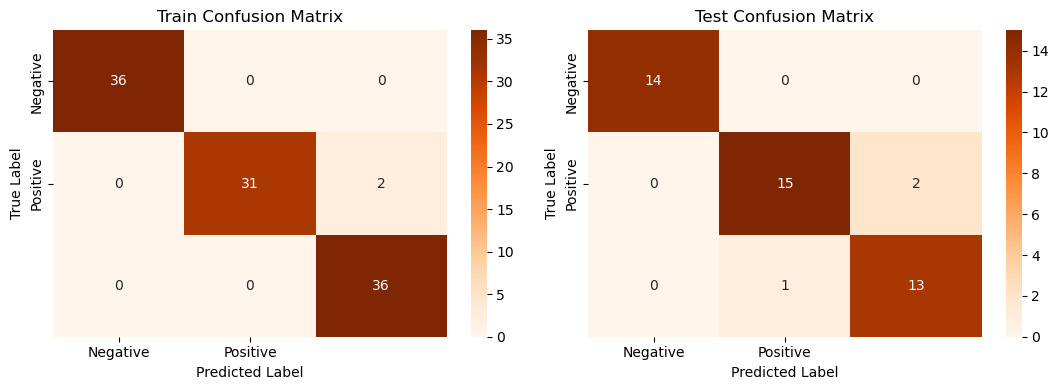


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  36        |
| 1            |    1        | 0.939394 |   0.96875  |  33        |
| 2            |    0.947368 | 1        |   0.972973 |  36        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.982456 | 0.979798 |   0.980574 | 105        |
| weighted avg |    0.981955 | 0.980952 |   0.980912 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 14        |
| 1            |    0.9375   | 0.882353 |   0.909091 | 17        |
| 2            |    0.866667 | 0.928571 |   0.896552 | 14        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.9333

In [98]:
# Visualizing evaluation Metric Score chart
rf2_score = evaluate_model(rf_model2, x_train, x_test, y_train, y_test)

In [99]:
score['Random Forest tuned'] = rf2_score

In [100]:
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned
Precision Train,0.981955,0.981955,1.000000,0.973626,1.000000,0.981955
Precision Test,0.934093,0.955556,0.934093,0.916481,0.934093,0.934907
Recall Train,0.980952,0.980952,1.000000,0.971429,1.000000,0.980952
Recall Test,0.933333,0.955556,0.933333,0.911111,0.933333,0.933333
Accuracy Train,0.980952,0.980952,1.000000,0.971429,1.000000,0.980952
Accuracy Test,0.933333,0.955556,0.933333,0.911111,0.933333,0.933333
F1 macro Train,0.980912,0.980912,1.000000,0.971320,1.000000,0.980912
F1 macro Test,0.933051,0.955556,0.933051,0.911296,0.933051,0.933473


### ML Model - 4 : SVM (Support Vector Machine)


In [101]:
svm_model = SVC(kernel='linear',random_state=0,probability=True)



Confusion Matrix:


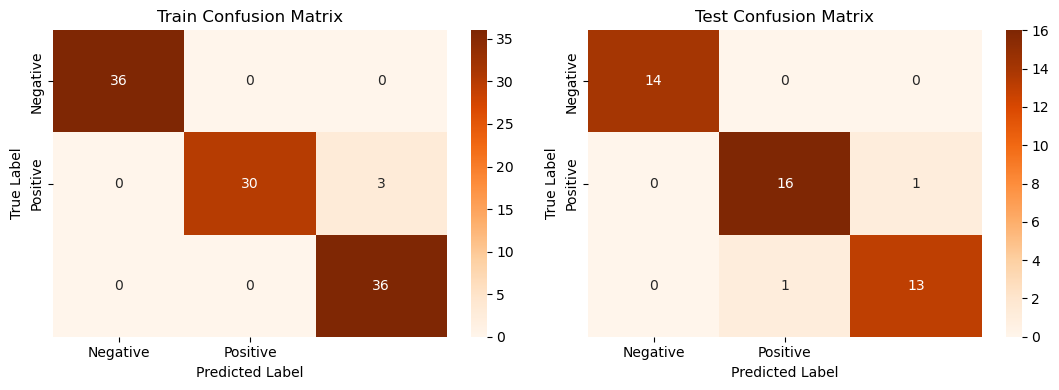


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  36        |
| 1            |    1        | 0.909091 |   0.952381 |  33        |
| 2            |    0.923077 | 1        |   0.96     |  36        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.974359 | 0.969697 |   0.970794 | 105        |
| weighted avg |    0.973626 | 0.971429 |   0.97132  | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 14        |
| 1            |    0.941176 | 0.941176 |   0.941176 | 17        |
| 2            |    0.928571 | 0.928571 |   0.928571 | 14        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [ ]:
svm_score = evaluate_model(svm_model,x_train,x_test,y_train,y_test)


In [103]:
# Updated Evaluation metric Score Chart
score['SVM'] = svm_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM
Precision Train,0.981955,0.981955,1.000000,0.973626,1.000000,0.981955,0.973626
Precision Test,0.934093,0.955556,0.934093,0.916481,0.934093,0.934907,0.955556
Recall Train,0.980952,0.980952,1.000000,0.971429,1.000000,0.980952,0.971429
Recall Test,0.933333,0.955556,0.933333,0.911111,0.933333,0.933333,0.955556
Accuracy Train,0.980952,0.980952,1.000000,0.971429,1.000000,0.980952,0.971429
Accuracy Test,0.933333,0.955556,0.933333,0.911111,0.933333,0.933333,0.955556
F1 macro Train,0.980912,0.980912,1.000000,0.971320,1.000000,0.980912,0.971320
F1 macro Test,0.933051,0.955556,0.933051,0.911296,0.933051,0.933473,0.955556


### 2. Cross- Validation & Hyperparameter Tuning


In [104]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': np.arange(0.1, 10, 0.1),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': np.arange(2, 6, 1)}

# Initialize the model
svm = SVC(random_state=0, probability=True)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV with kfold cross-validation
random_search = RandomizedSearchCV(svm, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'kernel': 'rbf', 'degree': 2, 'C': 5.6}


In [105]:
svm_model2 = SVC(C = best_params['C'],
           kernel = best_params['kernel'],
           degree = best_params['degree'],
           random_state=0, probability=True)


Confusion Matrix:


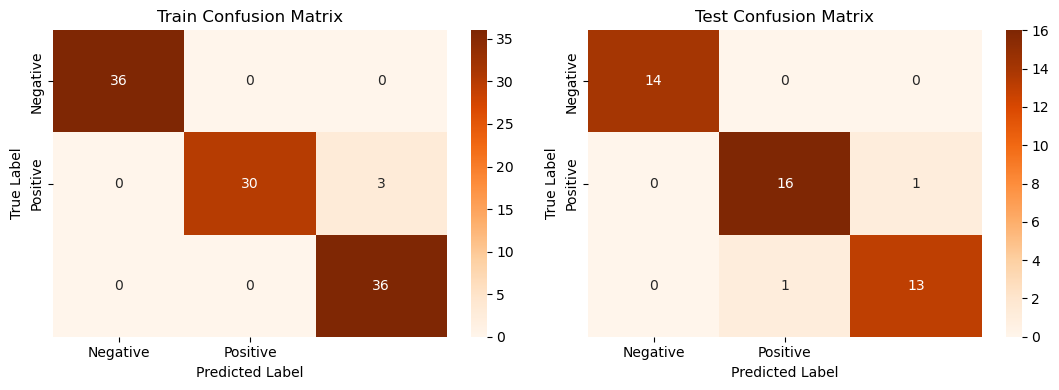


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  36        |
| 1            |    1        | 0.909091 |   0.952381 |  33        |
| 2            |    0.923077 | 1        |   0.96     |  36        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.974359 | 0.969697 |   0.970794 | 105        |
| weighted avg |    0.973626 | 0.971429 |   0.97132  | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 14        |
| 1            |    0.941176 | 0.941176 |   0.941176 | 17        |
| 2            |    0.928571 | 0.928571 |   0.928571 | 14        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [106]:
svm2_score = evaluate_model(svm_model2, x_train, x_test, y_train, y_test)


In [107]:
score['SVM tuned'] = svm2_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned
Precision Train,0.981955,0.981955,1.000000,0.973626,1.000000,0.981955,0.973626,0.973626
Precision Test,0.934093,0.955556,0.934093,0.916481,0.934093,0.934907,0.955556,0.955556
Recall Train,0.980952,0.980952,1.000000,0.971429,1.000000,0.980952,0.971429,0.971429
Recall Test,0.933333,0.955556,0.933333,0.911111,0.933333,0.933333,0.955556,0.955556
Accuracy Train,0.980952,0.980952,1.000000,0.971429,1.000000,0.980952,0.971429,0.971429
Accuracy Test,0.933333,0.955556,0.933333,0.911111,0.933333,0.933333,0.955556,0.955556
F1 macro Train,0.980912,0.980912,1.000000,0.971320,1.000000,0.980912,0.971320,0.971320
F1 macro Test,0.933051,0.955556,0.933051,0.911296,0.933051,0.933473,0.955556,0.955556


### ML Model - 5 : Xtreme Gradient Boosting


In [108]:
xgb_model = xgb.XGBClassifier()


Confusion Matrix:


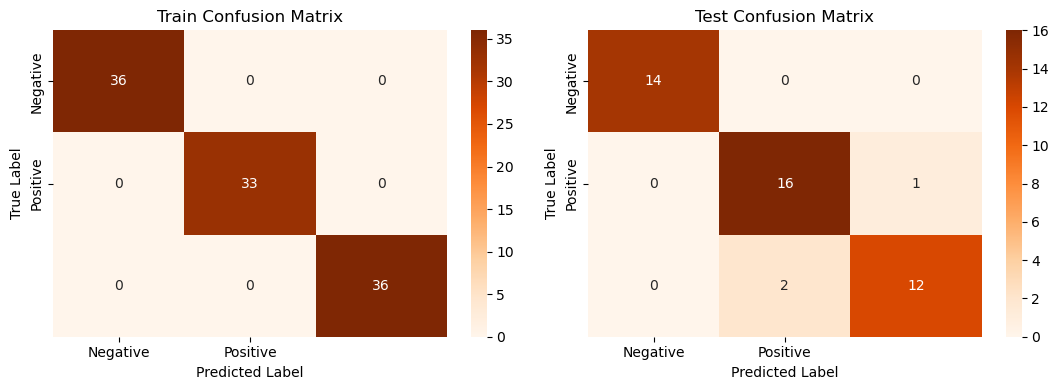


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        36 |
| 1            |           1 |        1 |          1 |        33 |
| 2            |           1 |        1 |          1 |        36 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 14        |
| 1            |    0.888889 | 0.941176 |   0.914286 | 17        |
| 2            |    0.923077 | 0.857143 |   0.888889 | 14        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.933333 |
| m

In [110]:
xgb_score = evaluate_model(xgb_model,x_train,x_test,y_train,y_test)

In [111]:
score['XGB'] = xgb_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB
Precision Train,0.981955,0.981955,1.000000,0.973626,1.000000,0.981955,0.973626,0.973626,1.000000
Precision Test,0.934093,0.955556,0.934093,0.916481,0.934093,0.934907,0.955556,0.955556,0.934093
Recall Train,0.980952,0.980952,1.000000,0.971429,1.000000,0.980952,0.971429,0.971429,1.000000
Recall Test,0.933333,0.955556,0.933333,0.911111,0.933333,0.933333,0.955556,0.955556,0.933333
Accuracy Train,0.980952,0.980952,1.000000,0.971429,1.000000,0.980952,0.971429,0.971429,1.000000
Accuracy Test,0.933333,0.955556,0.933333,0.911111,0.933333,0.933333,0.955556,0.955556,0.933333
F1 macro Train,0.980912,0.980912,1.000000,0.971320,1.000000,0.980912,0.971320,0.971320,1.000000
F1 macro Test,0.933051,0.955556,0.933051,0.911296,0.933051,0.933473,0.955556,0.955556,0.933051


### 2. Cross- Validation & Hyperparameter Tuning


In [112]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'learning_rate': np.arange(0.01, 0.3, 0.01),
              'max_depth': np.arange(3, 15, 1),
              'n_estimators': np.arange(100, 200, 10)}

# Initialize the model
xgb2 = xgb.XGBClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb2, param_grid, n_iter=10, cv=rskf)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 140, 'max_depth': 3, 'learning_rate': 0.060000000000000005}


In [113]:

# Initialize model with best parameters
xgb_model2 = xgb.XGBClassifier(learning_rate = best_params['learning_rate'],
                                 max_depth = best_params['max_depth'],
                               n_estimators = best_params['n_estimators'],
                                 random_state=0)


Confusion Matrix:


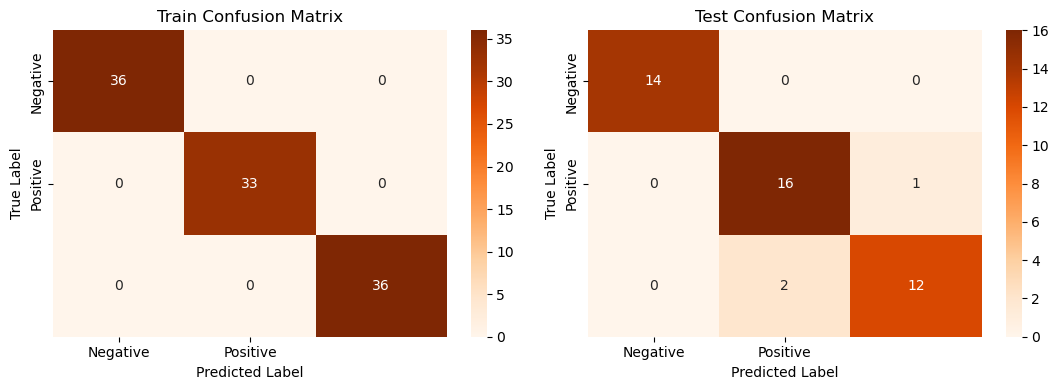


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        36 |
| 1            |           1 |        1 |          1 |        33 |
| 2            |           1 |        1 |          1 |        36 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 14        |
| 1            |    0.888889 | 0.941176 |   0.914286 | 17        |
| 2            |    0.923077 | 0.857143 |   0.888889 | 14        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.933333 |
| m

In [114]:
xgb2_score = evaluate_model(xgb_model2, x_train, x_test, y_train, y_test)

In [115]:
score['XGB tuned'] = xgb2_score

In [116]:
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned
Precision Train,0.981955,0.981955,1.000000,0.973626,1.000000,0.981955,0.973626,0.973626,1.000000,1.000000
Precision Test,0.934093,0.955556,0.934093,0.916481,0.934093,0.934907,0.955556,0.955556,0.934093,0.934093
Recall Train,0.980952,0.980952,1.000000,0.971429,1.000000,0.980952,0.971429,0.971429,1.000000,1.000000
Recall Test,0.933333,0.955556,0.933333,0.911111,0.933333,0.933333,0.955556,0.955556,0.933333,0.933333
Accuracy Train,0.980952,0.980952,1.000000,0.971429,1.000000,0.980952,0.971429,0.971429,1.000000,1.000000
Accuracy Test,0.933333,0.955556,0.933333,0.911111,0.933333,0.933333,0.955556,0.955556,0.933333,0.933333
F1 macro Train,0.980912,0.980912,1.000000,0.971320,1.000000,0.980912,0.971320,0.971320,1.000000,1.000000
F1 macro Test,0.933051,0.955556,0.933051,0.911296,0.933051,0.933473,0.955556,0.955556,0.933051,0.933051


### ML Model - 6 : Naive Bayes

In [117]:
nb_model = GaussianNB()


Confusion Matrix:


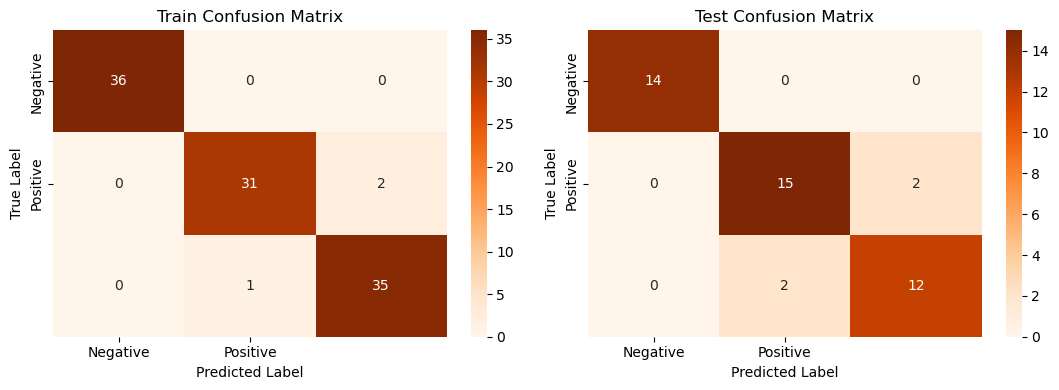


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  36        |
| 1            |    0.96875  | 0.939394 |   0.953846 |  33        |
| 2            |    0.945946 | 0.972222 |   0.958904 |  36        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.971565 | 0.970539 |   0.970917 | 105        |
| weighted avg |    0.971646 | 0.971429 |   0.971404 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 14        |
| 1            |    0.882353 | 0.882353 |   0.882353 | 17        |
| 2            |    0.857143 | 0.857143 |   0.857143 | 14        |
| accuracy     |    0.911111 | 0.911111 |   0.911111 |  0.9111

In [118]:
nb_score = evaluate_model(nb_model,x_train,x_test,y_train,y_test)

In [119]:
score['Naive Bayes'] = nb_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes
Precision Train,0.981955,0.981955,1.000000,0.973626,1.000000,0.981955,0.973626,0.973626,1.000000,1.000000,0.971646
Precision Test,0.934093,0.955556,0.934093,0.916481,0.934093,0.934907,0.955556,0.955556,0.934093,0.934093,0.911111
Recall Train,0.980952,0.980952,1.000000,0.971429,1.000000,0.980952,0.971429,0.971429,1.000000,1.000000,0.971429
Recall Test,0.933333,0.955556,0.933333,0.911111,0.933333,0.933333,0.955556,0.955556,0.933333,0.933333,0.911111
Accuracy Train,0.980952,0.980952,1.000000,0.971429,1.000000,0.980952,0.971429,0.971429,1.000000,1.000000,0.971429
Accuracy Test,0.933333,0.955556,0.933333,0.911111,0.933333,0.933333,0.955556,0.955556,0.933333,0.933333,0.911111
F1 macro Train,0.980912,0.980912,1.000000,0.971320,1.000000,0.980912,0.971320,0.971320,1.000000,1.000000,0.971404
F1 macro Test,0.933051,0.955556,0.933051,0.911296,0.933051,0.933473,0.955556,0.955556,0.933051,0.933051,0.911111


### 2. Cross- Validation & Hyperparameter Tuning


In [120]:
# ML Model - 6 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Initialize the model
naive = GaussianNB()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=4, random_state=0)

# Initialize GridSearchCV
GridSearch = GridSearchCV(naive, param_grid, cv=rskf, n_jobs=-1)

# Fit the GridSearchCV to the training data
GridSearch.fit(x_train, y_train)

# Select the best hyperparameters
best_params = GridSearch.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'var_smoothing': 0.01}


In [121]:
nb_model2 = GaussianNB(var_smoothing = best_params['var_smoothing'])



Confusion Matrix:


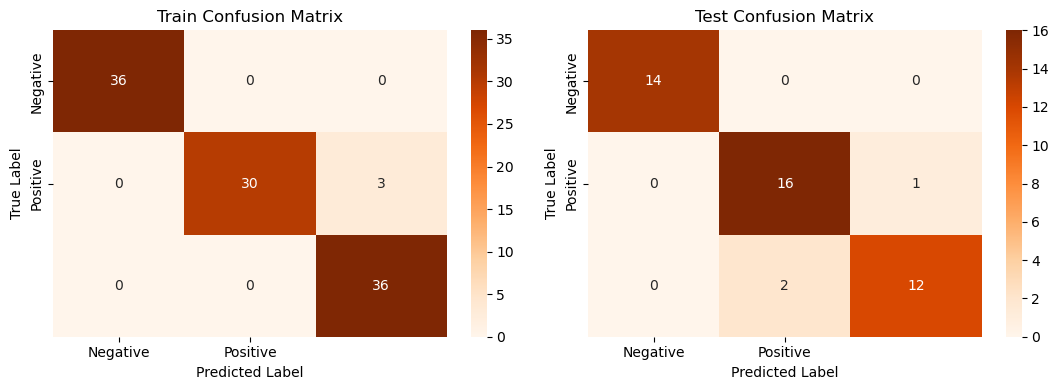


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  36        |
| 1            |    1        | 0.909091 |   0.952381 |  33        |
| 2            |    0.923077 | 1        |   0.96     |  36        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.974359 | 0.969697 |   0.970794 | 105        |
| weighted avg |    0.973626 | 0.971429 |   0.97132  | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 14        |
| 1            |    0.888889 | 0.941176 |   0.914286 | 17        |
| 2            |    0.923077 | 0.857143 |   0.888889 | 14        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.9333

In [122]:
nb2_score = evaluate_model(nb_model2, x_train, x_test, y_train, y_test)


In [123]:
score['Naive Bayes tuned']= nb2_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned
Precision Train,0.981955,0.981955,1.000000,0.973626,1.000000,0.981955,0.973626,0.973626,1.000000,1.000000,0.971646,0.973626
Precision Test,0.934093,0.955556,0.934093,0.916481,0.934093,0.934907,0.955556,0.955556,0.934093,0.934093,0.911111,0.934093
Recall Train,0.980952,0.980952,1.000000,0.971429,1.000000,0.980952,0.971429,0.971429,1.000000,1.000000,0.971429,0.971429
Recall Test,0.933333,0.955556,0.933333,0.911111,0.933333,0.933333,0.955556,0.955556,0.933333,0.933333,0.911111,0.933333
Accuracy Train,0.980952,0.980952,1.000000,0.971429,1.000000,0.980952,0.971429,0.971429,1.000000,1.000000,0.971429,0.971429
Accuracy Test,0.933333,0.955556,0.933333,0.911111,0.933333,0.933333,0.955556,0.955556,0.933333,0.933333,0.911111,0.933333
F1 macro Train,0.980912,0.980912,1.000000,0.971320,1.000000,0.980912,0.971320,0.971320,1.000000,1.000000,0.971404,0.971320
F1 macro Test,0.933051,0.955556,0.933051,0.911296,0.933051,0.933473,0.955556,0.955556,0.933051,0.933051,0.911111,0.933051


### ML Model - 7 : Neural Network


In [124]:
nn_model = MLPClassifier(random_state=0)


Confusion Matrix:


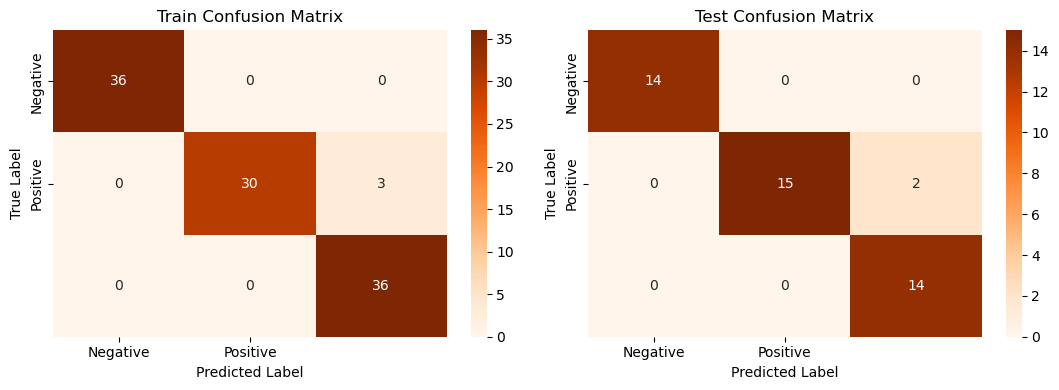


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  36        |
| 1            |    1        | 0.909091 |   0.952381 |  33        |
| 2            |    0.923077 | 1        |   0.96     |  36        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.974359 | 0.969697 |   0.970794 | 105        |
| weighted avg |    0.973626 | 0.971429 |   0.97132  | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 14        |
| 1            |    1        | 0.882353 |   0.9375   | 17        |
| 2            |    0.875    | 1        |   0.933333 | 14        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [127]:
neural_score = evaluate_model(nn_model,x_train,x_test,y_train,y_test)

In [128]:

# Updated Evaluation metric Score Chart
score['Neural Network'] = neural_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned,Neural Network
Precision Train,0.981955,0.981955,1.000000,0.973626,1.000000,0.981955,0.973626,0.973626,1.000000,1.000000,0.971646,0.973626,0.973626
Precision Test,0.934093,0.955556,0.934093,0.916481,0.934093,0.934907,0.955556,0.955556,0.934093,0.934093,0.911111,0.934093,0.961111
Recall Train,0.980952,0.980952,1.000000,0.971429,1.000000,0.980952,0.971429,0.971429,1.000000,1.000000,0.971429,0.971429,0.971429
Recall Test,0.933333,0.955556,0.933333,0.911111,0.933333,0.933333,0.955556,0.955556,0.933333,0.933333,0.911111,0.933333,0.955556
Accuracy Train,0.980952,0.980952,1.000000,0.971429,1.000000,0.980952,0.971429,0.971429,1.000000,1.000000,0.971429,0.971429,0.971429
Accuracy Test,0.933333,0.955556,0.933333,0.911111,0.933333,0.933333,0.955556,0.955556,0.933333,0.933333,0.911111,0.933333,0.955556
F1 macro Train,0.980912,0.980912,1.000000,0.971320,1.000000,0.980912,0.971320,0.971320,1.000000,1.000000,0.971404,0.971320,0.971320
F1 macro Test,0.933051,0.955556,0.933051,0.911296,0.933051,0.933473,0.955556,0.955556,0.933051,0.933051,0.911111,0.933051,0.955648


### 2. Cross- Validation & Hyperparameter Tuning

In [129]:
# ML Model - 7 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'hidden_layer_sizes': np.arange(10, 100, 10),
              'alpha': np.arange(0.0001, 0.01, 0.0001)}

# Initialize the model
neural = MLPClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(neural, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'hidden_layer_sizes': 60, 'alpha': 0.004900000000000001}


In [130]:
# Initiate model with best parameters
nn_model2 = MLPClassifier(hidden_layer_sizes = best_params['hidden_layer_sizes'],
                        alpha = best_params['alpha'],
                        random_state = 0)


Confusion Matrix:


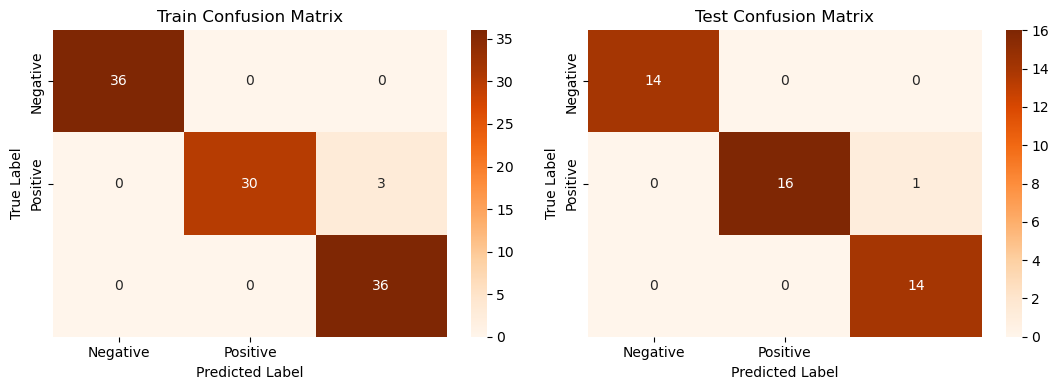


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  36        |
| 1            |    1        | 0.909091 |   0.952381 |  33        |
| 2            |    0.923077 | 1        |   0.96     |  36        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.974359 | 0.969697 |   0.970794 | 105        |
| weighted avg |    0.973626 | 0.971429 |   0.97132  | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 14        |
| 1            |    1        | 0.941176 |   0.969697 | 17        |
| 2            |    0.933333 | 1        |   0.965517 | 14        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [131]:

# Visualizing evaluation Metric Score chart
neural2_score = evaluate_model(nn_model2, x_train, x_test, y_train, y_test)

In [132]:
score['Neural Network tuned']= neural2_score

In [133]:
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned,Neural Network,Neural Network tuned
Precision Train,0.981955,0.981955,1.000000,0.973626,1.000000,0.981955,0.973626,0.973626,1.000000,1.000000,0.971646,0.973626,0.973626,0.973626
Precision Test,0.934093,0.955556,0.934093,0.916481,0.934093,0.934907,0.955556,0.955556,0.934093,0.934093,0.911111,0.934093,0.961111,0.979259
Recall Train,0.980952,0.980952,1.000000,0.971429,1.000000,0.980952,0.971429,0.971429,1.000000,1.000000,0.971429,0.971429,0.971429,0.971429
Recall Test,0.933333,0.955556,0.933333,0.911111,0.933333,0.933333,0.955556,0.955556,0.933333,0.933333,0.911111,0.933333,0.955556,0.977778
Accuracy Train,0.980952,0.980952,1.000000,0.971429,1.000000,0.980952,0.971429,0.971429,1.000000,1.000000,0.971429,0.971429,0.971429,0.971429
Accuracy Test,0.933333,0.955556,0.933333,0.911111,0.933333,0.933333,0.955556,0.955556,0.933333,0.933333,0.911111,0.933333,0.955556,0.977778
F1 macro Train,0.980912,0.980912,1.000000,0.971320,1.000000,0.980912,0.971320,0.971320,1.000000,1.000000,0.971404,0.971320,0.971320,0.971320
F1 macro Test,0.933051,0.955556,0.933051,0.911296,0.933051,0.933473,0.955556,0.955556,0.933051,0.933051,0.911111,0.933051,0.955648,0.977824


In [134]:
print(score.to_markdown())

|                 |   Logistic regression |   Logistic regression tuned |   Decision Tree |   Decision Tree tuned |   Random Forest |   Random Forest tuned |      SVM |   SVM tuned |      XGB |   XGB tuned |   Naive Bayes |   Naive Bayes tuned |   Neural Network |   Neural Network tuned |
|:----------------|----------------------:|----------------------------:|----------------:|----------------------:|----------------:|----------------------:|---------:|------------:|---------:|------------:|--------------:|--------------------:|-----------------:|-----------------------:|
| Precision Train |              0.981955 |                    0.981955 |        1        |              0.973626 |        1        |              0.981955 | 0.973626 |    0.973626 | 1        |    1        |      0.971646 |            0.973626 |         0.973626 |               0.973626 |
| Precision Test  |              0.934093 |                    0.955556 |        0.934093 |              0.916481 |        0.93409

# Selection of best model


In [ ]:
# Removing the overfitted models which have precision, recall, f1 scores for train as 1
score_t = score.transpose()            # taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Recall Train'] >= 0.98].index  # creating a list of models which have 1 for train and score_t['Accuracy Train']==1.0 and score_t['Precision Train']==1.0 and score_t['F1 macro Train']==1.0
remove_models

adj = score_t.drop(remove_models)                     # creating a new dataframe with required models
adj

,Precision Train,Precision Test,Recall Train,Recall Test,Accuracy Train,Accuracy Test,F1 macro Train,F1 macro Test
Decision Tree tuned,0.973626,0.916481,0.971429,0.911111,0.971429,0.911111,0.971320,0.911296
SVM,0.973626,0.955556,0.971429,0.955556,0.971429,0.955556,0.971320,0.955556
SVM tuned,0.973626,0.955556,0.971429,0.955556,0.971429,0.955556,0.971320,0.955556
Naive Bayes,0.971646,0.911111,0.971429,0.911111,0.971429,0.911111,0.971404,0.911111
Naive Bayes tuned,0.973626,0.934093,0.971429,0.933333,0.971429,0.933333,0.971320,0.933051
Neural Network,0.973626,0.961111,0.971429,0.955556,0.971429,0.955556,0.971320,0.955648
Neural Network tuned,0.973626,0.979259,0.971429,0.977778,0.971429,0.977778,0.971320,0.977824


In [136]:

def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [137]:
metrics = ['Precision', 'Recall', 'Accuracy', 'F1 macro']

best_models = select_best_model(adj, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")

The best models are:
Precision: Neural Network tuned - 0.9793
Recall: Neural Network tuned - 0.9778
Accuracy: Neural Network tuned - 0.9778
F1 macro: Neural Network tuned - 0.9778


In [138]:

# Take recall as the primary evaluation metric
score_smpl = score.transpose()
remove_overfitting_models = score_smpl[score_smpl['Recall Train']>=0.98].index
remove_overfitting_models
new_score = score_smpl.drop(remove_overfitting_models)
new_score = new_score.drop(['Precision Train','Precision Test','Accuracy Train','Accuracy Test','F1 macro Train','F1 macro Test'], axis=1)
new_score.index.name = 'Classification Model'
print(new_score.to_markdown())

| Classification Model   |   Recall Train |   Recall Test |
|:-----------------------|---------------:|--------------:|
| Decision Tree tuned    |       0.971429 |      0.911111 |
| SVM                    |       0.971429 |      0.955556 |
| SVM tuned              |       0.971429 |      0.955556 |
| Naive Bayes            |       0.971429 |      0.911111 |
| Naive Bayes tuned      |       0.971429 |      0.933333 |
| Neural Network         |       0.971429 |      0.955556 |
| Neural Network tuned   |       0.971429 |      0.977778 |


In [139]:
Category_RF = ['Iris-Setosa', 'Iris-Versicolor', 'Iris-Virginica']


## Prediction

In [ ]:
x_rf = np.array([[5.1, 3.5, 1.4, 0.2]])   # sepal length , sepal width , petal length , petal width
 
# Use the tuned random forest model (rf_model2) to make a prediction.
x_rf_prediction = rf_model2.predict(x_rf)
x_rf_prediction[0]

# Display the predicted category label.
print(Category_RF[int(x_rf_prediction[0])])

Iris-Setosa
